(問題1) 



In [ ]:
!wget http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('p2data.csv')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#与えられたデータの取得
y1_score = df.values[:,0]
y2_score = df.values[:,1]
y_true = df.values[:,2]

#予測の実行（閾値0.8)
y1_scorei = (y1_score<0.8).astype(int)
y2_scorei = (y2_score<0.8).astype(int)

#計算（検査A）
print('検査A')
#正解率
print('正解率:',accuracy_score(y_true,y1_scorei))
#再現率
print('再現率:',recall_score(y_true,y1_scorei))
#適合率
print('適合率:',precision_score(y_true,y1_scorei))
#F値
print('F値:',f1_score(y_true,y1_scorei))

#計算（検査B）
print('検査B')
#正解率
print('正解率:',accuracy_score(y_true,y2_scorei))
#再現率
print('再現率:',recall_score(y_true,y2_scorei))
#適合率
print('適合率:',precision_score(y_true,y2_scorei))
#F値
print('F値:',f1_score(y_true,y2_scorei))

--2022-10-12 06:47:09--  http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv
Resolving class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)... 131.113.98.81
Connecting to class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)|131.113.98.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762 [text/csv]
Saving to: ‘p2data.csv.25’

p2data.csv.25       100%[===================>]     762  --.-KB/s    in 0s      

2022-10-12 06:47:09 (115 MB/s) - ‘p2data.csv.25’ saved [762/762]

検査A
正解率: 0.7555555555555555
再現率: 0.9333333333333333
適合率: 0.5833333333333334
F値: 0.7179487179487181
検査B
正解率: 0.6222222222222222
再現率: 0.7333333333333333
適合率: 0.4583333333333333
F値: 0.5641025641025641


(問題2)

--2022-10-12 06:47:15--  http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv
Resolving class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)... 131.113.98.81
Connecting to class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)|131.113.98.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762 [text/csv]
Saving to: ‘p2data.csv.26’

p2data.csv.26       100%[===================>]     762  --.-KB/s    in 0s      

2022-10-12 06:47:15 (125 MB/s) - ‘p2data.csv.26’ saved [762/762]



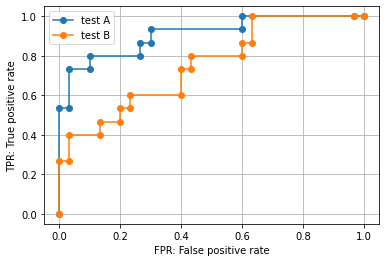

In [ ]:
!wget http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv('p2data.csv')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

#与えられたデータの取得
y1_score = df.values[:,0]
y2_score = df.values[:,1]
y_true = df.values[:,2]

#グラフの描画
roc = roc_curve(y_true, y1_score)
roc2 = roc_curve(y_true, y2_score)
print(roc)
plt.plot(1-roc[0], 1-roc[1], marker='o',label="test A") #閾値以下がpositiveなので反転する。
plt.plot(1-roc2[0], 1-roc2[1], marker='o',label="test B") #閾値以下がpositiveなので反転する。
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.legend()
plt.grid()


(問題3)

In [ ]:
from sklearn.metrics import roc_auc_score
aucA = 1-roc_auc_score(y_true, y1_score)
aucB = 1-roc_auc_score(y_true, y2_score)
print('検査A: ',aucA)
print('検査B: ',aucB)

検査A:  0.9088888888888889
検査B:  0.7511111111111111


(問題4)

AUCの値が1に近いこと、ROC曲線も左上に近いところを通っていることからもわかるように検査Aのほうがより信頼できると考えられる。